In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame as pd
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")
del df["Unnamed: 0"]
df

,adjusted_close,close,date,dividend_amount,high,id,low,open,split_coefficient,symbol,volume
0,10.6408,131.13,1998-01-02,0.0,131.500,MSFT1998-01-02,129.500,129.63,1.0,MSFT,4968500
1,10.5799,130.38,1998-01-05,0.0,133.630,MSFT1998-01-05,127.870,131.25,1.0,MSFT,10047200
2,10.6408,131.13,1998-01-06,0.0,133.000,MSFT1998-01-06,129.250,129.75,1.0,MSFT,8479300
3,10.5134,129.56,1998-01-07,0.0,131.190,MSFT1998-01-07,127.500,129.88,1.0,MSFT,7686600
4,10.5897,130.50,1998-01-08,0.0,132.130,MSFT1998-01-08,127.500,128.63,1.0,MSFT,9702400
5,10.3057,127.00,1998-01-09,0.0,131.500,MSFT1998-01-09,125.870,130.06,1.0,MSFT,10941800
6,10.5085,129.50,1998-01-12,0.0,130.000,MSFT1998-01-12,124.370,124.62,1.0,MSFT,9799200
7,10.7220,132.13,1998-01-13,0.0,132.250,MSFT1998-01-13,128.130,129.50,1.0,MSFT,8368200
8,10.6408,131.13,1998-01-14,0.0,132.500,MSFT1998-01-14,129.250,132.13,1.0,MSFT,6846800
9,10.7366,132.31,1998-01-15,0.0,133.000,MSFT1998-01-15,129.880,130.38,1.0,MSFT,6327800


In [3]:
dfn = pd.DataFrame()

for s in df.symbol.unique():
    subset = df.loc[df.symbol == s, ["date", "adjusted_close"]]
    subset[s] = subset.adjusted_close
    del subset["adjusted_close"]
    if dfn.empty:
        dfn = subset
    else:
        dfn = pd.merge(dfn, subset, on='date', how='outer')
dfn.fillna(1, inplace=True)
dfn

,date,MSFT,SPX,AMD,CNC,CNP,CTL,CERN,CF,SCHW,...,COF,CAH,KMX,CCL,CAT,CBOE,CBRE,CBS,CE,CELG
0,1998-01-02,10.6408,1.0000,9.655,1.00,9.5342,8.1836,2.7431,1.00,7.0410,...,14.5618,18.2739,4.7815,16.6380,13.9442,1.00,1.00,1.0000,1.00,0.3594
1,1998-01-05,10.5799,1.0000,9.655,1.00,9.3728,8.3377,2.9613,1.00,7.0743,...,14.4947,18.5871,4.6875,16.8277,14.1405,1.00,1.00,1.0000,1.00,0.3750
2,1998-01-06,10.6408,1.0000,9.940,1.00,9.4902,8.6692,3.0623,1.00,6.9973,...,14.6128,18.5273,4.6250,16.5217,14.0324,1.00,1.00,1.0000,1.00,0.3776
3,1998-01-07,10.5134,1.0000,9.500,1.00,9.3288,8.4935,2.6733,1.00,6.9203,...,14.2263,18.3480,4.2500,16.9806,13.7848,1.00,1.00,1.0000,1.00,0.4010
4,1998-01-08,10.5897,1.0000,9.470,1.00,9.5122,8.4206,2.6970,1.00,6.8014,...,14.2424,17.7503,3.9065,17.0204,13.3209,1.00,1.00,1.0000,1.00,0.3802
5,1998-01-09,10.3057,1.0000,9.125,1.00,9.4902,8.2449,2.5174,1.00,6.2976,...,14.0411,16.9590,3.7815,16.2922,12.9311,1.00,1.00,1.0000,1.00,0.3646
6,1998-01-12,10.5085,1.0000,8.875,1.00,9.6479,8.1107,2.4788,1.00,6.4183,...,14.1941,17.2435,3.9690,16.2739,13.2156,1.00,1.00,1.0000,1.00,0.3698
7,1998-01-13,10.7220,1.0000,10.440,1.00,9.5342,8.2764,2.6496,1.00,6.8224,...,14.4786,17.1670,3.8750,16.0628,13.1075,1.00,1.00,1.0000,1.00,0.3594
8,1998-01-14,10.6408,1.0000,9.220,1.00,9.5562,8.4106,2.6346,1.00,6.6807,...,14.7792,16.9877,3.8440,16.2158,13.1986,1.00,1.00,1.0000,1.00,0.3672
9,1998-01-15,10.7366,1.0000,9.030,1.00,9.3948,8.4106,2.6184,1.00,6.2976,...,15.9871,16.9590,3.6875,16.2158,13.0193,1.00,1.00,1.0000,1.00,0.3516


In [4]:
for c in dfn.columns[1:]:
    dfn[c] = (dfn[c].shift(-1) / (dfn[c]))
dfn.fillna(1, inplace=True)

In [5]:
for c in dfn.columns[1:]:
    if dfn[c].max() > 2:
        print(c, dfn[c].max())
        del dfn[c]
# dfn.max()

SPX 1455.22
CF 2.6178
CHTR 35.0
CMG 44.0
AAP 13.2309
XEC 14.9613
CFG 20.886
CME 5.3631
CXO 12.8709
COTY 15.1005
CCI 10.648
DAL 18.7934
FANG 17.3947
A 29.507
DLR 6.4655
DFS 23.9618
DISCA 6.9805
DISCK 8.0
DG 21.5315
DWDP 43.4251
DXC 52.8358
AKAM 145.2
EW 4.125
EQIX 33.282226008
ALK 8.8252
EVRG 52.257
EXPE 20.4759
EXR 6.515
FFIV 7.435
FB 38.2318
FIS 10.0343
FLT 27.25
FLR 10.55
FTNT 8.31
FTV 48.9303
FBHS 11.7639
GRMN 5.6243
GM 27.3178
GPN 3.61
GS 56.9131
ALGN 16.88
HBI 4.2293
HIG 2.02357718143
HCA 24.3533
ALLE 46.4233
HPE 9.0109
HLT 43.6297
HII 34.6227
INFO 26.7
ILMN 19.585
ADS 12.4806
ICE 7.2572
ISRG 6.08
IPGP 25.3486
IQV 42.11
JNPR 14.9819
KEYS 28.25
KIM 22.7411
KMI 22.653
GOOGL 50.3228
KHC 62.865
LLL 9.7979
LW 29.2948
GOOG 558.46
LIN 166.31
LYB 11.5572
MPC 15.8371
MA 4.3288
MET 8.4394
KORS 24.2
AAL 18.3791
MDLZ 12.9806
MSCI 23.52
NDAQ 13.1587
NWSA 14.8628
NWS 14.6326
NLSN 20.7747
NCLH 24.79
NRG 8.669
AMT 15.1332
PKG 7.0478
PYPL 40.47
AWK 15.1585
PM 29.7761
PSX 27.9841
AMP 27.8851
PFG 14

# Reinforcement learning

In [7]:
def get_date(date):
    return dfn.loc[df.date==date]
get_date('2019-07-12')

,date,MSFT,AMD,CNC,CNP,CTL,CERN,SCHW,CVX,CB,...,COG,CDNS,CPB,ADBE,COF,CAH,KMX,CCL,CAT,CELG
5415,2019-07-12,1.0,1.035531,0.991745,1.004157,1.004918,0.99619,1.004236,0.997936,1.013323,...,0.979583,1.002399,1.004888,0.997867,0.985506,0.998109,0.998313,1.014916,1.009251,0.998151


In [8]:
def calc_date(date, symbols):
    ss = dfn.loc[df.date==date, symbols]
    return ss.product(axis=1)
calc_date('2019-07-12', ['SPX', 'CTL', 'MSFT'])

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


5415    1.004918
dtype: float64

In [9]:
dfn = dfn.loc[dfn.date > "2011-01-01"]
dfn.columns[1:3:1]

Index(['MSFT', 'AMD'], dtype='object')

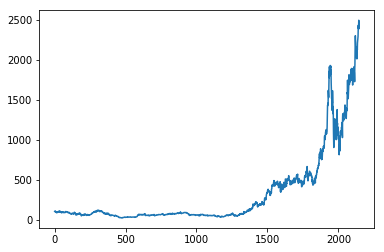

In [10]:
delta = dfn[dfn.columns[1:3:1]].product(axis=1) 
# delta = dfn[["MSFT"]].product(axis=1) 

v = 100
vv = []
for d in delta:
    v *= d
    vv.append(v)

plt.plot(vv[:-2])
plt.show()

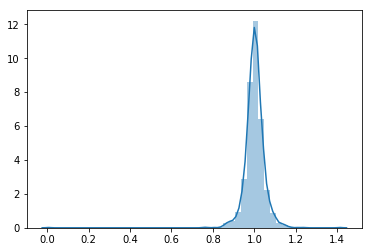

In [11]:
import seaborn as sns

sns.distplot(delta)
plt.show()